In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pyaudio

'ready'

'ready'

# Exercise 1a

In [60]:
from helper_functions import start_play, stop_play, play_frequency
from time import sleep

C4 = 261.63
G4 = 392.0
A4 = 440

stream = start_play(sample_rate=44100)

breath = 0.5
play_frequency(stream, frequency=C4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=C4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=G4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=G4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=A4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=A4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=G4, duration=2.0-breath, sample_rate=44100, amplitude=1.0)

stop_play(stream)

In [22]:
D4 = 293.66
A4 = 440.0
B4 = 493.88

stream = start_play(sample_rate=44100)

breath = 0.5
play_frequency(stream, frequency=D4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=D4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=A4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=A4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=B4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=B4, duration=1.0-breath, sample_rate=44100, amplitude=1.0)
sleep(breath)
play_frequency(stream, frequency=A4, duration=2.0-breath, sample_rate=44100, amplitude=1.0)

stop_play(stream)

# Exercise 1b and 1c

In [48]:
from helper_functions import start_play, stop_play, play_frequency
from time import sleep
from exercise1b import piano_note_frequencies

freq_map = piano_note_frequencies()

def play_note(stream: pyaudio.Stream, note: str, length: float, tempo: int, sample_rate: int = 44100, amplitude: float = 1.0, pause_fraction: float = 0.5, max_pause_duration: float = 0.5):
    """
    Play a piano note given a set of parameters
    :param stream: PyAudio stream object
    :param note: Note to be played (e.g., 'C4', 'D#5', 'Bb3')
    :param length: Duration of the note in beats (e.g., 1.0 for a quarter note, 0.5 for an eighth note)
    :param tempo: Tempo in beats per minute (BPM) for a quarter note
    :param sample_rate: Samples per second (44100 is the default audio sample rate)
    :param amplitude: Amplitude of the sound wave (0.0 to 1.0), 1.0 is the default amplitude
    :pause_fraction: a fraction of the note length to use as the pause duration (default 0.1)
    :max_pause_duration: a maximum duration for the pause (default 0.5 seconds)
    :return: None
    """
    duration = length*60.0/tempo
    pause = min(max_pause_duration, duration * pause_fraction)
    adjusted_duration = duration - pause
    if note not in freq_map:
        if note == "R":
            frequency = 0
        else:
            raise ValueError(f"Invalid music note symbol: {note}")
    else:
        frequency = freq_map[note]
    play_frequency(stream, frequency, adjusted_duration, sample_rate, amplitude)
    sleep(pause)
    return
'ready'

'ready'

In [61]:
# test
stream = start_play(sample_rate=44100)

tempo = 90

play_note(stream, "D4", 1.0, tempo)
play_note(stream, "D4", 1.0, tempo)
play_note(stream, "A4", 1.0, tempo)
play_note(stream, "A4", 1.0, tempo)
play_note(stream, "B4", 1.0, tempo)
play_note(stream, "B4", 1.0, tempo)
play_note(stream, "A4", 2.0, tempo)
stop_play(stream)
'done'

'done'

In [62]:
stream = start_play(sample_rate=44100)

tempo = 90
notes = ["D4","D4","A4","A4","B4","B4","A4",
         "G4","G4","F#4","F#4","E4","E4","D4",
         "A4","A4","G4","G4","F#4","F#4","E4",
         "A4","A4","G4","G4","F#4","F#4","E4",
         "D4","D4","A4","A4","B4","B4","A4",
         "G4","G4","F#4","F#4","E4","E4","D4",
        ]
lengths = [1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
          ]

for note, length in zip(notes, lengths):
    play_note(stream, note, length, tempo)

stop_play(stream)
'done'

'done'

# Exercise 2a

In [17]:
import pyaudio
def play_score(stream: pyaudio.Stream, score: str, tempo: int):
    """
    Play a score given a set of parameters
    :param stream: PyAudio stream object
    :param score: Score string in the format "<note1>/<length1>,<note2>/<length2>, ..., <noteN>/<lengthN>"
    :param tempo: Tempo in beats per minute (BPM) for a quarter note
    :return: None
    """
    for pair in score.split(","):
        try:
            note, length = pair.split("/")
        except:
            raise ValueError(f"cannot parse {pair}")
        play_note(stream, note, float(length), tempo)
    return
'ready'

'ready'

In [63]:
stream = start_play(sample_rate=44100)
tempo = 60
score = "A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.75,E4/0.25,F4/0.5,C5/0.5,E4/1.5,C5/0.25,C5/0.25,B4/0.75,F#4/0.25,F#4/0.5,B4/0.5,B4/1,R/0.5"
play_score(stream, score, tempo)
stop_play(stream)

In [55]:
stream = start_play(sample_rate=44100)
tempo = 60
score = []
score.append("A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.75,E4/0.25,F4/0.5,C5/0.5,E4/1.5,C5/0.25,C5/0.25,B4/0.75,F#4/0.25,F#4/0.5,B4/0.5,B4/1,R/0.5")
score.append("A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.25,B4/0.25,A4/0.5,B4/0.5,G#4/0.5,A4/2,R/0.5")
score.append("C5/0.25,D5/0.25,E5/0.75,D5/0.25,E5/0.5,G5/0.5,D5/1.5,G4/0.5,C5/0.75,B4/0.25,C5/0.5,E5/0.5,E5/2")
score.append("A4/0.25,B4/0.25,C5/0.5,B4/0.25,C5/0.25,D5/0.5,C5/0.75,G4/0.25,G4/1,F5/0.5,E5/0.5,D5/0.5,C5/0.5,E5/2.5")
score.append("E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,G5/0.5,E5/1.5")
score.append("E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,B4/0.5,A4/1.0,R/0.5")
score.append("A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.375,B4/0.375,A4/1,B4/1,G#4/1,A4/4")
play_score(stream, ",".join(score), tempo)
stop_play(stream)

# Exercise 2b

In [64]:
stream = start_play()
filename = "sample_score.txt"
title = None
tempo = None
score = None
with open(filename, "r") as fh:
    for line in fh:
        if line.startswith("title"):
            title = line.split(":")[1].strip()
            print(f"title: {title}")
        elif line.startswith("tempo"):
            tempo = int(line.split(":")[1].strip())
            print(f"tempo: {tempo}")
        elif line.startswith("score"):
            score = line.split(":")[1].strip()
            print(f"score: {score}")
            play_score(stream, score, tempo=tempo)
        else:
            print(f"Cannot parse line: {line}")
stop_play(stream)

title: Guess what this song is
tempo: 60
score: A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.75,E4/0.25,F4/0.5,C5/0.5,E4/1.5,C5/0.25,C5/0.25,B4/0.75,F#4/0.25,F#4/0.5,B4/0.5,B4/1,R/0.5,A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.25,B4/0.25,A4/0.5,B4/0.5,G#4/0.5,A4/2,R/0.5,C5/0.25,D5/0.25,E5/0.75,D5/0.25,E5/0.5,G5/0.5,D5/1.5,G4/0.5,C5/0.75,B4/0.25,C5/0.5,E5/0.5,E5/2,A4/0.25,B4/0.25,C5/0.5,B4/0.25,C5/0.25,D5/0.5,C5/0.75,G4/0.25,G4/1,F5/0.5,E5/0.5,D5/0.5,C5/0.5,E5/2.5,E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,G5/0.5,E5/1.5,E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,B4/0.5,A4/1.0,R/0.5,A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.375,B4/0.375,A4/1,B4/1,G#4/

# Exercise 3a

In [2]:
from contextlib import AbstractContextManager
from exercise1b import piano_note_frequencies
import pyaudio
from time import sleep
from typing import Dict, List, Optional, Union

from helper_functions import start_play, stop_play, play_frequency

# AbstractContextManager helps provide convenient functions for resource management
class MusicNotePlayer(AbstractContextManager):
    def __init__(self, tempo: int = 60, sample_rate: float = 44100, amplitude: float = 1.0, pause_fraction: float = 0.5, max_pause_duration: float = 0.5):
        self.tempo = tempo
        self.sample_rate = sample_rate
        self.amplitude = amplitude
        self.pause_fraction = pause_fraction
        self.max_pause_duration = max_pause_duration

        # initialize freq_map
        self.freq_map = piano_note_frequencies()
        # add rest note
        self.freq_map["R"] = 0

        # initialize internal cache
        self.cache = []

        # The rest part of __init__ is for resource managing. Please don't modify
        self._closed = True
        self.start()

    def set_tempo(self, tempo: int):
        self.tempo = tempo

    def play_note(self, note: str, length: float):
        """
        Play a piano note given a set of parameters
        :param note: Note to be played (e.g., 'C4', 'D#5', 'Bb3')
        :param length: Duration of the note in beats (e.g., 1.0 for a quarter note, 0.5 for an eighth note)
        """
        duration = length*60.0/self.tempo
        pause = min(self.max_pause_duration, duration * self.pause_fraction)
        adjusted_duration = duration - pause
        if note not in self.freq_map:
            raise ValueError(f"Invalid music note symbol: {note}")
        else:
            frequency = self.freq_map[note]
        # check if stream is alive
        if self._closed:
            self.start()
        play_frequency(self.stream, frequency, adjusted_duration, self.sample_rate, self.amplitude)
        sleep(pause)
        
    def play_score(self, score: str):
        for pair in score.split(","):
            try:
                note, length = pair.split("/")
            except:
                raise ValueError(f"cannot parse {pair}")
            self.play_note(note, float(length))

    def play_score_file(self, filename: str, reset_tempo: bool = False):
        title = None
        tempo = None
        score = None
        with open(filename, "r") as fh:
            for line in fh:
                if line.startswith("title"):
                    title = line.split(":")[1].strip()
                    print(f"title: {title}")
                elif line.startswith("tempo"):
                    tempo = int(line.split(":")[1].strip())
                    if tempo == self.tempo:
                        print(f"tempo {tempo}")
                    elif reset_tempo:
                        print(f"tempo is reset from {self.tempo} to {tempo}")
                        self.tempo = tempo
                    else:
                        print(f"ignore tempo {tempo}, keep using tempo {self.tempo}")
                elif line.startswith("score"):
                    score = line.split(":")[1].strip()
                    print(f"score: {score}")
                    self.play_score(score)
                else:
                    print(f"Cannot parse line: {line}")
                    
    def add_score(self, score: str):
        self.cache.append(score)
        print(f"Added to cache: {score}")
        
    def add_score_file(self, filename: str):
        with open(filename, "r") as fh:
            for line in fh:
                if line.startswith("score"):
                    score = line.split(":")[1].strip()
                    self.cache.append(score)
                    print(f"Added to cache: {score}")
                else:
                    pass
        
    def undo_add_score(self):
        try:
            score = self.cache.pop()
            print(f"Removed from cache: {score}")
        except IndexError:
            print("There is nothing to be removed")
        
    def get_scores(self) -> str:
        return ",".join(self.cache)
        
    def replay(self):
        if len(self.cache) > 0:
            self.play_score(self.get_scores())
        else:
            print(f"There is nothing to play!")
        
    def reset(self):
        print(f"Internal cache is reset")
        self.cache = []
    
    # The rest is for resource managing. Please don't modify
    def start(self):
        # don't start twice
        if self._closed:
            self.p = pyaudio.PyAudio()
            self.stream = self.p.open(format=pyaudio.paFloat32, # Use float32 format for audio data
                                    channels=1,               # Mono audio
                                    rate=self.sample_rate,         # Set up the sample rate
                                    output=True)
            self._closed = False
        
    def close(self):
        # don't close twice
        if self._closed:
            return

        self.stream.stop_stream()
        self.stream.close()
        self.p.terminate()
        self._closed = True

    def __exit__(self, exc_type, exc, tb):
        self.close()
        return False  # don’t suppress exceptions

'ready'

'ready'

In [24]:
filename = "sample_score.txt"
with MusicNotePlayer(tempo=60) as p:
    p.play_score_file(filename)

title: Guess what this song is
tempo 60
score: A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.75,E4/0.25,F4/0.5,C5/0.5,E4/1.5,C5/0.25,C5/0.25,B4/0.75,F#4/0.25,F#4/0.5,B4/0.5,B4/1,R/0.5,A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.25,B4/0.25,A4/0.5,B4/0.5,G#4/0.5,A4/2,R/0.5,C5/0.25,D5/0.25,E5/0.75,D5/0.25,E5/0.5,G5/0.5,D5/1.5,G4/0.5,C5/0.75,B4/0.25,C5/0.5,E5/0.5,E5/2,A4/0.25,B4/0.25,C5/0.5,B4/0.25,C5/0.25,D5/0.5,C5/0.75,G4/0.25,G4/1,F5/0.5,E5/0.5,D5/0.5,C5/0.5,E5/2.5,E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,G5/0.5,E5/1.5,E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,B4/0.5,A4/1.0,R/0.5,A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.375,B4/0.375,A4/1,B4/1,G#4/1

In [21]:
with MusicNotePlayer(tempo=60) as p:
    p.add_score("A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5")
    p.replay()
    p.add_score("A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.375,B4/0.375,A4/1,B4/1,G#4/1,A4/4")
    p.replay()
    print(p.get_scores())
    p.undo_add_score()
    p.replay()
    p.reset()
    p.close()
'all done'

'ready'

# Exercise 3b

In [3]:
import json

class MusicNotePlayerWithSave(MusicNotePlayer):
    def to_json(self, filename: str):
        # build the dict to save to json
        dump_dict = {"tempo": self.tempo, "sample_rate":self.sample_rate, "amplitude": self.amplitude,
                    "pause_fraction": self.pause_fraction, "max_pause_duration": self.max_pause_duration,
                    "cache": self.cache}
        with open(filename, "w") as json_file:
            json.dump(dump_dict, json_file)
        print(f"Successfully written to {filename}")

    def from_json(self, filename: str):
        with open(filename, "r") as json_file:
            dump_dict = json.load(json_file)
        self.tempo = dump_dict["tempo"] 
        self.sample_rate =  dump_dict["sample_rate"]
        self.amplitude = dump_dict["amplitude"]
        self.pause_fraction = dump_dict["pause_fraction"]
        self.max_pause_duration = dump_dict["max_pause_duration"]
        self.cache = dump_dict["cache"]
        print(f"Successfully written to {filename}")
'ready'

'ready'

In [28]:
with MusicNotePlayerWithSave(tempo=60) as p:
    p.add_score_file("sample_score.txt")
    p.to_json("sample_save.json")
'done'

Added to cache: A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.75,E4/0.25,F4/0.5,C5/0.5,E4/1.5,C5/0.25,C5/0.25,B4/0.75,F#4/0.25,F#4/0.5,B4/0.5,B4/1,R/0.5,A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.25,B4/0.25,A4/0.5,B4/0.5,G#4/0.5,A4/2,R/0.5,C5/0.25,D5/0.25,E5/0.75,D5/0.25,E5/0.5,G5/0.5,D5/1.5,G4/0.5,C5/0.75,B4/0.25,C5/0.5,E5/0.5,E5/2,A4/0.25,B4/0.25,C5/0.5,B4/0.25,C5/0.25,D5/0.5,C5/0.75,G4/0.25,G4/1,F5/0.5,E5/0.5,D5/0.5,C5/0.5,E5/2.5,E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,G5/0.5,E5/1.5,E5/0.5,A5/1,G5/1,E5/0.5,D5/0.25,C5/1.25,D5/0.5,C5/0.25,D5/0.75,B4/0.5,A4/1.0,R/0.5,A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5,E4/0.5,A4/0.75,G4/0.25,A4/0.5,C5/0.5,G4/1.5,E4/0.5,F4/0.5,C5/0.25,B4/0.75,C5/0.5,D5/0.5,E5/0.25,C5/1.25,C5/0.375,B4/0.375,A4/1,B4/1,G#4/1,A4/4
Successfully written to s

'done'

In [32]:
with MusicNotePlayerWithSave(tempo=60) as p:
    p.from_json("sample_save.json")
    p.replay()

Successfully written to sample_save.json


# Exercise 4a

In [4]:
def piano_note_rank() -> Dict[str, int]:
    sharp = ['A','A#','B','C','C#','D','D#','E','F','F#','G','G#']
    flat  = ['A','Bb','B','C','Db','D','Eb','E','F','Gb','G','Ab']

    note2rank = {}
    rank2note_sharp = []
    rank2note_flat = []
    for i in range(88):                         # i = 0..87, A0..C8
        idx = i % 12
        octave = (i + 9) // 12                  # A0→0, C1→1, ..., C8→8
        name_sharp = f"{sharp[idx]}{octave}"
        name_flat  = f"{flat[idx]}{octave}"
        note2rank[name_sharp] = i
        note2rank[name_flat]  = i
        rank2note_sharp.append(name_sharp)
        rank2note_flat.append(name_flat)
    return note2rank, rank2note_sharp, rank2note_flat
'ready'

'ready'

In [6]:
class MusicNotePlayerV2a(MusicNotePlayerWithSave):
    def play_score(self, score: str, transpose: int = 0):
        note2rank, rank2note_sharp, rank2note_flat = piano_note_rank()
        for pair in score.split(","):
            try:
                note, length = pair.split("/")
            except:
                raise ValueError(f"cannot parse {pair}")
            idx = note2rank[note]
            idx += transpose
            note = rank2note_sharp[idx]
            self.play_note(note, float(length))

    def replay(self, transpose: int = 0):
        if len(self.cache) > 0:
            self.play_score(self.get_scores(), transpose)
        else:
            print(f"There is nothing to play!")
'ready'

'ready'

In [14]:
transpose = 3
with MusicNotePlayerV2a(tempo=60) as p:
    p.add_score("A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5")
    p.replay()
    sleep(1)
    p.replay(transpose=transpose)
'done'

Added to cache: A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5


'done'

# Exercise 4b

In [11]:
class MusicNotePlayerV2b(MusicNotePlayerWithSave):
    def play_note(self, note: str, length: float, transpose: int = 0):
        duration = length*60.0/self.tempo
        pause = min(self.max_pause_duration, duration * self.pause_fraction)
        adjusted_duration = duration - pause
        if note not in self.freq_map:
            raise ValueError(f"Invalid music note symbol: {note}")
        else:
            frequency = self.freq_map[note]
        # shift the frequency
        frequency *= (2 ** (transpose / 12.0))
        # check if stream is alive
        if self._closed:
            self.start()
        play_frequency(self.stream, frequency, adjusted_duration, self.sample_rate, self.amplitude)
        sleep(pause)
        
    def play_score(self, score: str, transpose: int = 0):
        for pair in score.split(","):
            try:
                note, length = pair.split("/")
            except:
                raise ValueError(f"cannot parse {pair}")
            self.play_note(note, float(length), transpose)

    def replay(self, transpose: int = 0):
        if len(self.cache) > 0:
            self.play_score(self.get_scores(), transpose)
        else:
            print(f"There is nothing to play!")
'ready'

'ready'

In [13]:
transpose = 3
with MusicNotePlayerV2b(tempo=60) as p:
    p.add_score("A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5")
    p.replay()
    sleep(1)
    p.replay(transpose=transpose)
'done'

Added to cache: A4/0.25,B4/0.25,C5/0.75,B4/0.25,C5/0.5,E5/0.5,B4/1.5


'done'

# Exercise 5a

In [26]:
from helper_functions import play_frequency
def play_frequencies(stream: pyaudio.Stream, frequencies: List[float], duration: float, sample_rate: int, amplitude: float):
    """
    Play a sound given a set of parameters
    :param stream: PyAudio stream object
    :param frequencies: A list of frequencies of the sounds in Hertz
    :param duration: Duration to play the sound in seconds
    :param sample_rate: Samples per second (44100 is the common audio sample rate)
    :param amplitude: Amplitude of the sound wave (0.0 to 1.0)
    :return: None
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    # Generate sine wave
    # The formula for a sine wave is A * sin(2 * pi * f * t)
    # where A is amplitude, f is frequency, and t is time
    # initialize the wave with zeros and then add each frequency on top of it
    sine_wave = t * 0
    for frequency in frequencies:
        sine_wave += amplitude * np.sin(2 * np.pi * frequency * t)
    stream.write(sine_wave.astype(np.float32).tobytes())

D4 = piano_note_frequencies()["D4"]
F4 = piano_note_frequencies()["F4"]
A4 = piano_note_frequencies()["A4"]

stream = start_play(sample_rate=44100)
play_frequencies(stream, frequencies=[D4], duration=1.0, sample_rate=44100, amplitude=1.0)
sleep(0.5)
play_frequencies(stream, frequencies=[D4, F4], duration=1.0, sample_rate=44100, amplitude=1.0)
sleep(0.5)
play_frequencies(stream, frequencies=[D4, F4, A4], duration=1.0, sample_rate=44100, amplitude=1.0)
stop_play(stream)
'done'

'done'

# Exercise 5b

In [32]:
from typing import Callable, Dict, List, Optional, Union

def play_frequencies(stream: pyaudio.Stream, frequencies: List[float], duration: float, sample_rate: int, amplitude: float, wave_func: Callable):
    """
    Play a sound given a set of parameters
    :param stream: PyAudio stream object
    :param frequencies: A list of frequencies of the sounds in Hertz
    :param duration: Duration to play the sound in seconds
    :param sample_rate: Samples per second (44100 is the common audio sample rate)
    :param amplitude: Amplitude of the sound wave (0.0 to 1.0)
    :param wave_func: the wave function object that takes in frequency and time grids, 
        returns wave as a list of float.
    :return: None
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    # Generate wave
    # initialize the wave with zeros and then add each frequency on top of it
    wave = t * 0
    for frequency in frequencies:
        wave += amplitude * wave_func(frequency, t)
    stream.write(wave.astype(np.float32).tobytes())

def sine_wave(frequency: float, t: List[float]) -> List[float]:
    # The formula for a sine wave is sin(2 * pi * f * t)
    # where f is frequency, and t is time
    return np.sin(2 * np.pi * frequency * t)

def box_wave(frequency: float, t: List[float]) -> List[float]:
    # The formula for a sine wave is sin(2 * pi * f * t)
    # where f is frequency, and t is time
    return np.floor(np.sin(2 * np.pi * frequency * t)+1)

D4 = piano_note_frequencies()["D4"]
F4 = piano_note_frequencies()["F4"]
A4 = piano_note_frequencies()["A4"]

stream = start_play(sample_rate=44100)
play_frequencies(stream, frequencies=[D4], duration=1.0, sample_rate=44100, amplitude=1.0, wave_func=sine_wave)
sleep(0.5)
play_frequencies(stream, frequencies=[D4, F4], duration=1.0, sample_rate=44100, amplitude=1.0, wave_func=sine_wave)
sleep(0.5)
play_frequencies(stream, frequencies=[D4, F4, A4], duration=1.0, sample_rate=44100, amplitude=1.0, wave_func=sine_wave)
sleep(0.5)
play_frequencies(stream, frequencies=[D4], duration=1.0, sample_rate=44100, amplitude=1.0, wave_func=box_wave)
sleep(0.5)
play_frequencies(stream, frequencies=[D4, F4], duration=1.0, sample_rate=44100, amplitude=1.0, wave_func=box_wave)
sleep(0.5)
play_frequencies(stream, frequencies=[D4, F4, A4], duration=1.0, sample_rate=44100, amplitude=1.0, wave_func=box_wave)
stop_play(stream)

# Exercise 5c

In [51]:
from exercise1b import piano_note_frequencies

freq_map = piano_note_frequencies()

def play_notes(stream: pyaudio.Stream, notes: str, length: float, tempo: int, sample_rate: int = 44100, amplitude: float = 1.0, pause_fraction: float = 0.5, max_pause_duration: float = 0.5, wave_func: Callable = sine_wave):
    """
    Play a piano note given a set of parameters
    :param stream: PyAudio stream object
    :param notes: Notes to be played, separated by _, ended by - if not pause is added (e.g., 'C4-_Eb4_Gb4_A4')
    :param length: Duration of the note in beats (e.g., 1.0 for a quarter note, 0.5 for an eighth note)
    :param tempo: Tempo in beats per minute (BPM) for a quarter note
    :param sample_rate: Samples per second (44100 is the default audio sample rate)
    :param amplitude: Amplitude of the sound wave (0.0 to 1.0), 1.0 is the default amplitude
    :pause_fraction: a fraction of the note length to use as the pause duration (default 0.1)
    :max_pause_duration: a maximum duration for the pause (default 0.5 seconds)
    :return: None
    """
    duration = length*60.0/tempo
    pause = min(max_pause_duration, duration * pause_fraction)
    adjusted_duration = duration - pause
    # go through notes
    frequencies_main = []
    frequencies_pause = []
    for note in notes.split("_"):
        extend = False
        # extension flag
        if note.endswith("-"):
            extend = True
            # strip the extension flag
            note = note[:-1]
        if note not in freq_map:
            if note == "R":
                frequency = 0
            else:
                raise ValueError(f"Invalid music note symbol: {note}")
        else:
            frequencies_main.append(freq_map[note])
            if extend:
                frequencies_pause.append(freq_map[note])
    if not frequencies_pause:
        frequencies_pause.append(0)
            
    play_frequencies(stream, frequencies_main, adjusted_duration, sample_rate, amplitude, sine_wave)
    play_frequencies(stream, frequencies_pause, pause, sample_rate, amplitude, wave_func)

stream = start_play(sample_rate=44100)

tempo = 90
notes_all = ["D4_D3-","D4_D3-","A4_F#3-","A4_F#3-","B4_G3-","B4_G3-","A4_D3",
         "G4_G2-","G4_G2-","F#4_D3-","F#4_D3-","E4_A2-","E4_A2-","D4_D3",
         "A4_D3-","A4_D3-","G4_A2-","G4_A2-","F#4_D3-","F#4_D3-","E4_A2",
         "A4_D3-","A4_D3-","G4_A2-","G4_A2-","F#4_D3-","F#4_D3-","E4_A2",
         "D4_D3-","D4_D3-","A4_F#3-","A4_F#3-","B4_G3-","B4_G3-","A4_D3",
         "G4_G3","G4_E3","F#4_D3","F#4_B2","E4_C#3","E4_A2","D4_D3",
        ]
lengths = [1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
           1,1,1,1,1,1,2,
          ]

for notes, length in zip(notes_all, lengths):
    play_notes(stream, notes, length, tempo)

stop_play(stream)

# Exercise 5d

In [60]:
class MusicNotePlayerV3(MusicNotePlayerV2b):
    def __init__(self, tempo: int = 60, sample_rate: float = 44100, amplitude: float = 1.0, pause_fraction: float = 0.5, max_pause_duration: float = 0.5, wave_func: Callable = sine_wave):
        super().__init__(tempo, sample_rate, amplitude, pause_fraction, max_pause_duration)
        # add a new parameter for the wave func choice
        self.wave_func = wave_func
        
    def play_notes(self, notes: str, length: float, transpose: int = 0):
        duration = length*60.0/tempo
        pause = min(self.max_pause_duration, duration * self.pause_fraction)
        adjusted_duration = duration - pause
        # go through notes
        frequencies_main = []
        frequencies_pause = []
        for note in notes.split("_"):
            extend = False
            # extension flag
            if note.endswith("-"):
                extend = True
                # strip the extension flag
                note = note[:-1]
            if note not in self.freq_map:
                raise ValueError(f"Invalid music note symbol: {note}")
            else:
                frequency = self.freq_map[note]
                # shift the frequency
                frequency *= (2 ** (transpose / 12.0))
                frequencies_main.append(frequency)
                if extend:
                    frequencies_pause.append(frequency)
        if not frequencies_pause:
            frequencies_pause.append(0)
        
        # check if stream is alive
        if self._closed:
            self.start()
        play_frequencies(self.stream, frequencies_main, adjusted_duration, self.sample_rate, self.amplitude, self.wave_func)
        play_frequencies(self.stream, frequencies_pause, pause, self.sample_rate, self.amplitude, self.wave_func)
        
    def play_score(self, score: str, transpose: int = 0):
        for pair in score.split(","):
            try:
                notes, length = pair.split("/")
            except:
                raise ValueError(f"cannot parse {pair}")
            self.play_notes(notes, float(length), transpose)
'ready'

'ready'

In [61]:
transpose = 3
with MusicNotePlayerV3(tempo=60) as p:
    p.add_score("D4_D3-/1,D4_D3-/1,A4_F#3-/1,A4_F#3-/1,B4_G3-/1,B4_G3-/1,A4_D3/2")
    p.replay()
    sleep(1)
    p.replay(transpose=transpose)
'done'

Added to cache: D4_D3-/1,D4_D3-/1,A4_F#3-/1,A4_F#3-/1,B4_G3-/1,B4_G3-/1,A4_D3/2


'done'

# Exercise 6a

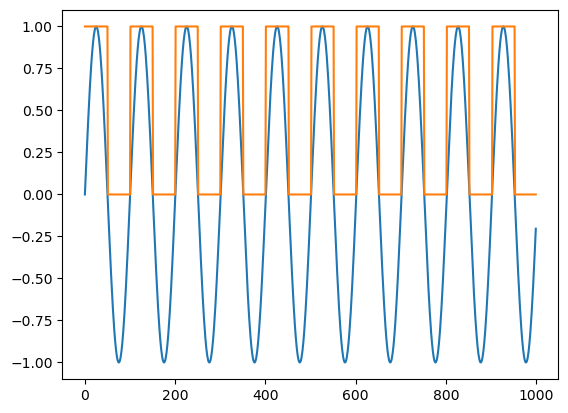

In [73]:
import matplotlib.pyplot as plt
duration = 1
sample_rate = 44100
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
A4 = 440
plt.figure()
plt.plot(sine_wave(A4, t)[:1000])
plt.plot(box_wave(A4, t)[:1000])
plt.show()

# Exercise 6b (old)

In [109]:
buffer = 1024
sample_rate = 44100
def start_record(sample_rate: float = 44100) -> pyaudio.Stream:
    """
    :param sample_rate: samples per second (441000  is the common audio sample rate)
    """
    # Initialize PyAudio
    p = pyaudio.PyAudio()
    
    # Open audio stream
    stream = p.open(format=pyaudio.paFloat32, # Use float32 format for audio data
                    channels=1,               # Mono audio
                    rate=sample_rate,         # Set up the sample rate
                    input=True,
                    frames_per_buffer=buffer)
    return stream

def stop_record(stream: pyaudio.Stream):
    """
    Stop and close the PyAudio stream
    :param stream: PyAudio stream object
    :return: None
    """
    p = stream._parent
    stream.stop_stream()
    stream.close()
    p.terminate()

def plot_wave(wave: np.ndarray):
    pass

record_length_secs = 1
stream = start_record(sample_rate)
frames = []
for i in range(0, int(sample_rate / buffer * record_length_secs)):
    data = stream.read(buffer, exception_on_overflow=False)
    frames.append(data)
stop_record(stream)
'done'

'done'

43
Float32 value: from 0.0 to 0.0


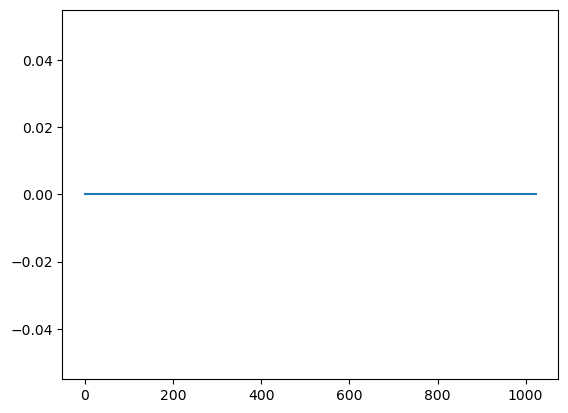

In [110]:
print(len(frames))
byte_data = frames[-1]
float_value = np.frombuffer(byte_data, dtype=np.float32)

print(f"Float32 value: from {np.min(float_value)} to {np.max(float_value)}")
plt.plot(float_value)

# Exercise 6b

Wave value: from -10705 to 10775


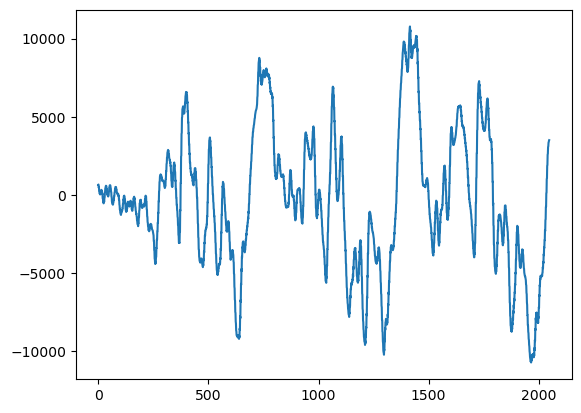

In [103]:
import wave
wf = wave.open("c1.wav", "rb")
byte_data = wf.readframes(buffer)
float_value = np.frombuffer(byte_data, dtype=np.int16)

print(f"Wave value: from {np.min(float_value)} to {np.max(float_value)}")
plt.plot(float_value)